# Decision Trees, Visualizing Decision Boundaries, and Evaluation

Tingting Yang

INDE 577 - Data Science and Machine Learning

A decision tree is a type of non-parametric supervised learning that can be used for both regression and classification. In this notebook we explore classification decision trees on an artificial dataset.

#### Dataset

We use the an artificial data, [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset from [sklearn.datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) to make two interleaving half circles.

#### Goal

Using decision tree to classify, show the decision boundaries, and evaluate the algorithm by confusion matrix. 

#### Tools

In order to do this, I need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [sklearn](https://scikit-learn.org/stable/index.html)

In [1]:
# Import the necessaty libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---

### Data Exploration and Data Wrangling

After importing the dataset, we simply plot the scatter plot to have an overall impression of the data distribution.

In [2]:
# The artificial data will be taken from sklearn (make_moons)
from sklearn.datasets import make_moons

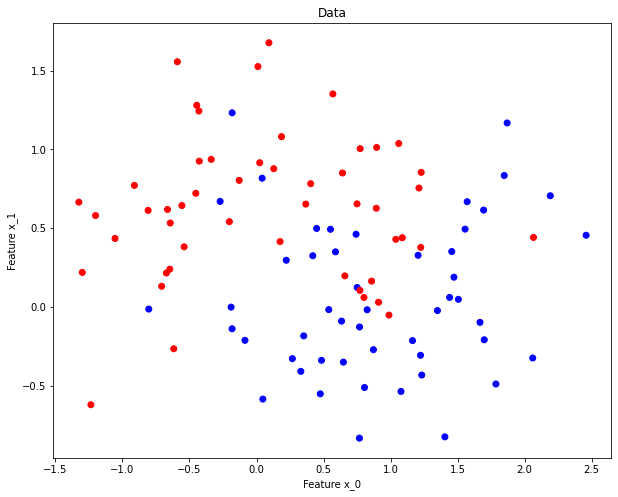

In [3]:
# Scatter plot for the dataset
X, y = make_moons(noise = 0.40, random_state = 3)
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("Feature x_0")
plt.ylabel("Feature x_1")
plt.title("Data")
plt.show()

### Train and Test Data Split

In [4]:
# Use the train_test_split function in sklearn package
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4,
                                                    random_state = 42)

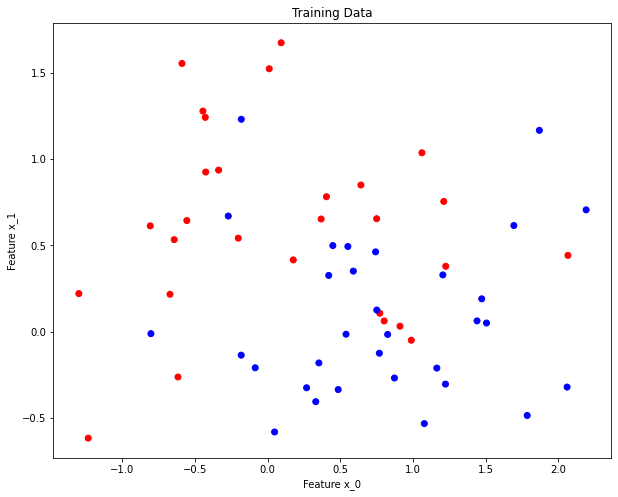

In [5]:
# Scatter plot for the training data
c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize = (10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("Feature x_0")
plt.ylabel("Feature x_1")
plt.title("Training Data")
plt.show()

In [6]:
# Make lists for features and labels
features = ["x_0", "x_1"]
labels = ["red", "blue"]

---

### Implement Decision Tree

We will use the DecisionTreeClassifier from sklearnDocumentation can be found at [tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

In [7]:
# Import the necessaty libraries
from sklearn.tree import DecisionTreeClassifier

# Using DecisionTreeClassifier to train the data
decision_tree = DecisionTreeClassifier(max_depth = 2, random_state = 42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Visualizing the Decision Tree

First, to plot the tree, we use the [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) tool from [sklearn.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) to visualize the decision tree.

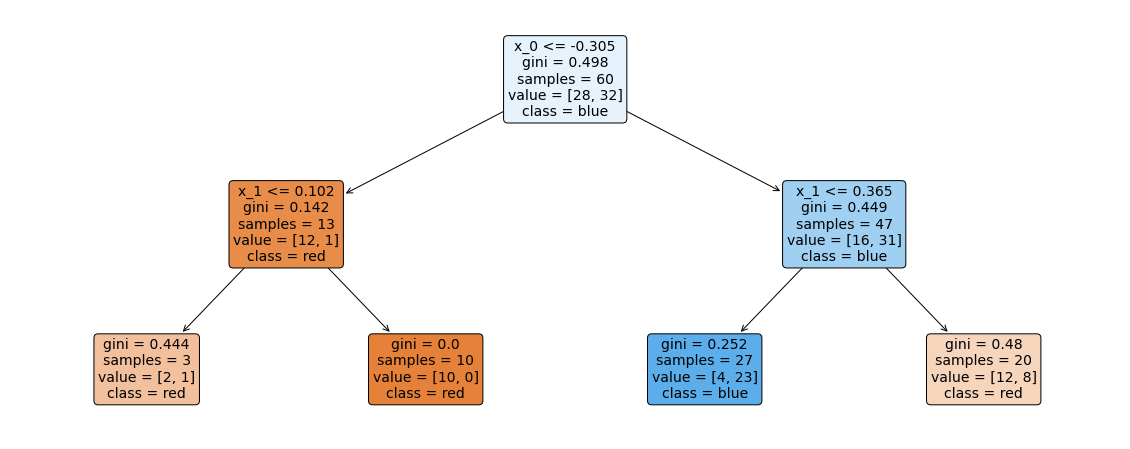

In [8]:
# Import the necessaty libraries
from sklearn import tree

# Plot decision tree using plot_tree
plt.figure(figsize = (20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True,
                   fontsize = 14)
plt.show()

The tree plot also show the conditions for spliting the nodes with Gini index, sample size, classification, and other information.

Besides this, we also use another way to visualize the tree. We use the [export_text](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html#sklearn.tree.export_text) tool from [sklear.tree](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree). This tool can build a text report showing the rules of a decision tree. Let's see!

In [9]:
## Build a text report showing the rules of the tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_0 <= -0.30
|   |--- x_1 <= 0.10
|   |   |--- class: 0
|   |--- x_1 >  0.10
|   |   |--- class: 0
|--- x_0 >  -0.30
|   |--- x_1 <= 0.36
|   |   |--- class: 1
|   |--- x_1 >  0.36
|   |   |--- class: 0



---

### Visualizing Decision Boundaries for Training Data

In the following code cell we show the decision boundaries from our trained tree.


Text(0.5, 1.0, 'Decision Boundaries for Training Data')

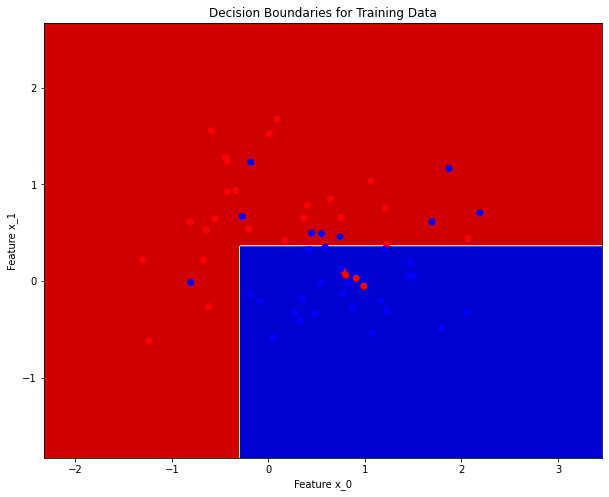

In [10]:
# Set a plot_step
plot_step = 0.02

plt.figure(figsize = (10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# plt.tight_layout(h_hap = 0.5, w_pad = 0.5, pad = 2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = "jet_r") #blue and red coloring

plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("Feature x_0")
plt.ylabel("Feature x_1")
plt.title("Decision Boundaries for Training Data")

From the decision boundaries plot, there are some points predicted incorrectly by the model. And thus, we need to assess the performance of the decision tree algorithm.

---

### Assessing the Performance

First, we can use the confusion matrix to assess the performance of the decision tree algorithm.

---

#### The Confusion Matrix

In many instances we are interested in the following terms:
* true positives -> predicted true and actually true
* false positives -> predicted true and not actually true
* false negatives -> predicted false bu actually true
* true negatives -> predited false and actually false
    
All of these possibilities are contained in the confusion matrix.

We will output the confusion matrix for test data. To achieve this, we need two more tools:

* [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) tool from sklearn: to generate confusion matrix and calculate the rates and scores.
* [seaborn](https://seaborn.pydata.org/) to plot the confusion matrix.


In [11]:
# Import metrics from sklearn
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

In [12]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)

In [13]:
# Output the confusion matrix
print(confusion_matrix)

[[20  2]
 [ 5 13]]


#### Visualize the Confusion Matrix

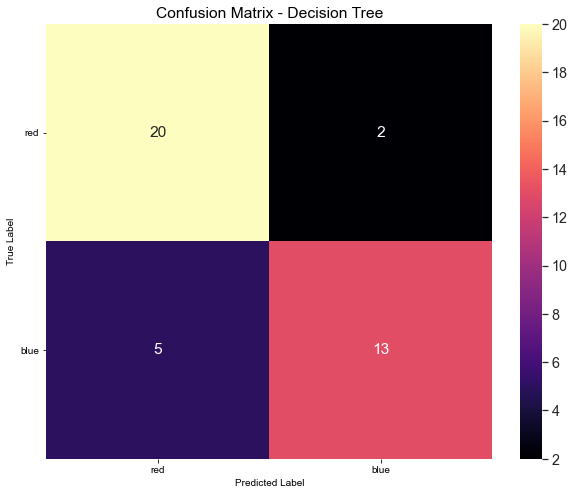

In [14]:
# Plot confusion matrix using seaborn
plt.figure(figsize = (10, 8))
ax = plt.axes()
sns.set(font_scale = 1.3)

sns.heatmap(matrix_df,
            annot = True,
            fmt = "g",
            ax = ax,
            cmap = "magma")

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize = 10)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize = 10)
ax.set_yticklabels(labels, rotation = 0)
plt.show()

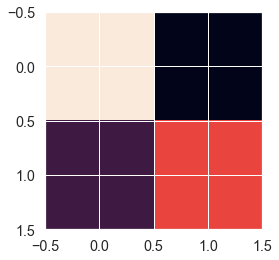

In [15]:
# Using matplotlib to plot the confusion matrix
plt.imshow(confusion_matrix)

---

#### Visualize the Boundaries for Testing Data

Text(0.5, 1.0, 'Decision Boundaries for Testing Data')

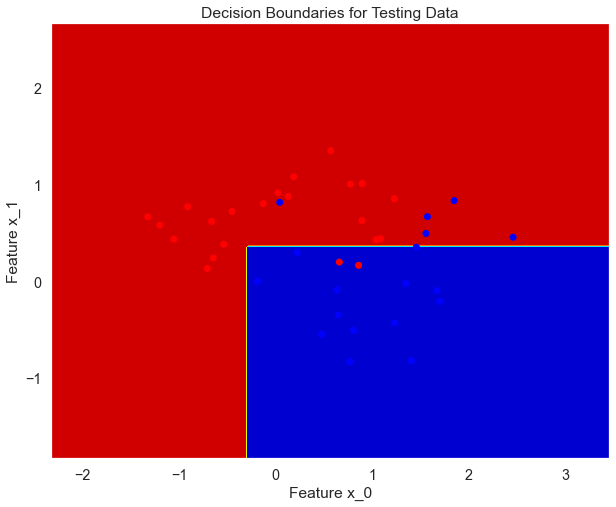

In [16]:
# Set a plot_step
plot_step = 0.02

plt.figure(figsize = (10, 8))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# plt.tight_layout(h_hap = 0.5, w_pad = 0.5, pad = 2.5)

Z = decision_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap = "jet_r") #blue and red coloring

plt.scatter(X_test[:, 0], X_test[:, 1], c = c_test)
plt.xlabel("Feature x_0")
plt.ylabel("Feature x_1")
plt.title("Decision Boundaries for Testing Data")

Although there are also some points that are predicted incorrectly, the overall performance is good. Let's check some rates and scores that reflect the performance of the decision tree algorhthm!

**Accuracy** is the fraction of predictions that the model correctly predicts. The formula is

$$\text{Accuracy} = \frac {\text{No. of correct predictions}}{\text{Total No. of predictions}}= \frac {\text{True Positive} + \text{True Negative}}{\text{True Positive} + \text{True Negative} + \text{False Positive} + \text{False Negative}}$$

In [17]:
print(f"accuracy score = {metrics.accuracy_score(y_test, test_pred_decision_tree)}")

accuracy score = 0.825


**Precision** is the proportion of positive identifications that are actually correct. It tells us how many values we prediceted to be in a certain class are actually in that class!

$$\text{Precious} = \frac {\text{True Positive}}{\text{True Positive} + \text{False Positive}}$$

In [18]:
print(f"precision score")

precision = metrics.precision_score(y_test,
                                    test_pred_decision_tree,
                                    average = None)

# Convert to pandas dataframe
precision_results = pd.DataFrame(precision, index = labels)

precision_results.rename(columns = {0:"precision"}, inplace = True)
precision_results

precision score


,precision
red,0.800000
blue,0.866667


Let's also check the recall and the $F_1$ score!

**Recall** is the proportion of actual positives that are identified correctly.

$$\text{Recall} = \frac {\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

**$F_1$ Score** is another way to show the accuracy, and it is the harmonic mean of the precison and recall.

$$F_1 \text{ Score} = \frac {2 \times \text{Recall} \times \text{Precious}}{\text{Recall} + \text{Precious}}=\frac{\text{True Positive}}{\text{True Positive}+\frac{1}{2}(\text{False Positive}+\text{False Negative})}$$

In [19]:
# Recall and the f1-score
print(metrics.classification_report(y_test, test_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.87      0.72      0.79        18

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



---

### Conclusion

Overall, the performance of decision tree algorithm to classify this artificial dataset is good, since the accuracy, precision, recall, and $F_1$ scores are relatively high (greater than $0.80$) for both groups.